## date 12/12/2024

In [9]:

# Define a function for custom max value selection
def find_max_values(batch):
    length = len(batch)
    if length in [4, 5, 6]:  # Special case for lengths 4, 5, and 6
        # Find max value from the first 3 elements
        max_first_part = max(batch[:3])
        # Find max value from the remaining elements
        max_second_part = max(batch[3:]) if length > 3 else None
        return [max_first_part, max_second_part] if max_second_part is not None else [max_first_part]
    elif length in [7, 8, 9]:  # Special case for lengths 8 and 9
        # Max from the first 3 values
        max_first_part = max(batch[:3])
        # Max from the next 3 values
        max_second_part = max(batch[3:6])
        # Max from the remaining values
        max_remaining = max(batch[6:]) if length > 6 else None
        return [max_first_part, max_second_part, max_remaining] if max_remaining is not None else [max_first_part, max_second_part]
    elif length == 1:  # Special case for length 1
        return batch  # Return the single value as is
    elif length == 3:  # Special case for length 3
        return [max(batch)]  # Return the maximum of the batch
    else:  # Default case (no special rule)
        return [max(batch)]  # Return the overall max

def rx_data(value_p):
    s_batch = []
    rx_mess = []
    len_b = []
    start_idx = None
    for i, avg_pixel in enumerate(value_p):
        int_avg = int(avg_pixel)
        if int_avg == 0:
            if start_idx is not None and start_idx<i:
                b_in_b = value_p[start_idx:i]
                # call the max value function
                max1_values = find_max_values(b_in_b)
                rx_mess.append(max1_values)
                s_batch.append(b_in_b)
                len_b.append(len(b_in_b))
            start_idx = None
        else:
            if start_idx is None:
                start_idx = i

    if start_idx is not None and start_idx<len(value_p):
        bin_b = value_p[start_idx:]
        # call the max value function
        max2_values = find_max_values(bin_b)
        rx_mess.append(max2_values)
        s_batch.append(bin_b)
        len_b.append(len(bin_b))

    # print("batch value_p",s_batch)
    # print("each batch length",len_b)
    # print("rx message",rx_mess)

    # Flatten the list of max values batches and remove brackets/parentheses
    flat_max_values = [value for batch in rx_mess for value in batch]

    if len(flat_max_values)==128:
        # Convert to a space-separated string for cleaner output
        result = " ,".join(map(str, flat_max_values))
        return result



In [15]:
import numpy as np
from PIL import Image
import os

output_directory=fr'F:\My File\OCC_Nov_11\Datasets_L8_8_subcarrier\4_rx_decoded_data\m1'  # Folder to save the decoded data

# Define the batch size
batch_size = 128  # Adjust the batch size as per your needs

# Create the output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Define the threshold
threshold = 50.0  # Define threshold for batch separation

# Loop over all TIFF files in the input directory

# Load each TIFF image
image_path = fr'F:\My File\OCC_Nov_11\Datasets_L8_8_subcarrier\3_rx_image\m288\41.tiff'  # Folder containing the tiff images
image = Image.open(image_path)
image_data = np.array(image).astype(float)

# Extract specific column range (e.g., columns 850 to 1000)
columns_range_data = image_data[:, 750:1050]
column_avg = np.mean(columns_range_data, axis=1)

# Flatten the array of column-averaged values
flat_column_avg = column_avg.flatten()
#print("average value",flat_column_avg)
np.savetxt('column_flat_column_avg_values.txt', flat_column_avg, fmt='%.3f')

# updated_data, removed_indices = remove_consecutive_duplicates(flat_column_avg)
# print("Updated Data:", updated_data)
# print("Removed Indices:", removed_indices)
# Initialize variables for batch creation
# Initialize variables for batch creation
batches_column_avg = []  # List to store batches

l= len(flat_column_avg)
start_idx = None

i=0
while i<l:
    if flat_column_avg[i]==0:
        zero_count =1
        while i+zero_count<l and flat_column_avg[i+zero_count]==0:
            zero_count+=1
           
        if zero_count>3:
            if start_idx is not None:
                batches_column_avg.append(np.round(flat_column_avg[start_idx:i],5))
                start_idx = None
            i+= zero_count-1
        else:
            if start_idx is None:
                start_idx=i+zero_count
            i+=zero_count-1
    else:
        if start_idx is None:
            start_idx = i
    i+=1
   
if start_idx is not None and start_idx<l:
    batches_column_avg.append(np.round(flat_column_avg[start_idx:],5))

#print("Batches with Zeros <= 3 Included:", batches_column_avg)

# Process each batch and average every two pixels, excluding first and last batch
for i, batch in enumerate(batches_column_avg[0:], start=0):  # Exclude first and last batch
    #print(f" Batch {i}: Original Data{np.array(batch).shape}")
    #print(np.array(np.round(batch,4)))  # Print the original batch content
    output_rx = rx_data(batch)
    print("rx_message", output_rx)
    
print("Processing complete for all TIFF files.")


rx_message None
rx_message 12.77667 ,8.54 ,10.69333 ,14.80667 ,6.46 ,10.72 ,18.71333 ,12.69333 ,11.00333 ,18.39 ,10.09333 ,12.69333 ,19.86333 ,9.98667 ,10.51 ,8.24 ,17.69667 ,13.42667 ,15.52667 ,13.30667 ,9.09 ,11.24 ,10.12333 ,13.21667 ,15.59333 ,7.77333 ,9.13333 ,15.72 ,14.08333 ,15.24667 ,11.34667 ,13.47333 ,13.42667 ,15.71 ,18.02 ,9.17667 ,7.08667 ,15.79 ,9.14 ,11.37667 ,11.49333 ,13.40333 ,14.34667 ,11.44667 ,18.17333 ,15.61667 ,7.14667 ,15.52667 ,12.69667 ,15.85 ,9.26 ,12.79 ,15.92333 ,13.54667 ,9.23667 ,5.60667 ,9.32667 ,8.01 ,11.63333 ,16.77333 ,9.20667 ,14.65 ,18.27667 ,10.26 ,11.48 ,15.58667 ,13.48667 ,16.00333 ,16.56 ,3.25 ,15.59 ,15.57333 ,13.13667 ,14.71333 ,11.36667 ,3.36333 ,13.96667 ,15.85333 ,9.17667 ,14.15333 ,20.72333 ,14.01 ,14.25667 ,11.53333 ,10.43333 ,13.65333 ,7.2 ,9.3 ,13.57667 ,19.36333 ,13.64667 ,12.25 ,7.28 ,10.60667 ,13.59 ,8.60667 ,10.02333 ,5.64 ,15.99333 ,16.44667 ,9.30333 ,17.59333 ,16.17667 ,13.69333 ,18.03333 ,20.38333 ,13.74667 ,14.66667 ,11.64 ,9.43

In [ ]:
import numpy as np
from PIL import Image
import os

for k in range(1, 426):
    # Define input and output directories
    input_directory = fr'F:\My File\OCC_Nov_11\Dataset_16subcarrier\rx_image\m{k}'  # Folder containing the tiff images
    output_directory=fr'F:\My File\OCC_Nov_11\Dataset_16subcarrier\rx_decoded_data\m{k}'  # Folder to save the decoded data

    # Define the batch size
    batch_size = 128  # Adjust the batch size as per your needs

    # Create the output directory if it doesn't exist
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    # Get all TIFF files in the input directory
    tiff_files = [f for f in os.listdir(input_directory) if f.endswith('.tiff')]

    # Define the threshold
    threshold = 15.0  # Define threshold for batch separation


    # Loop over all TIFF files in the input directory
    for tiff_file in tiff_files:
        # Load each TIFF image
        image_path = os.path.join(input_directory, tiff_file)
        image = Image.open(image_path)
        image_data = np.array(image).astype(float)

        # Extract specific column range (e.g., columns 850 to 1000)
        columns_range_data = image_data[:, 800:1100]
        column_avg = np.mean(columns_range_data, axis=1)

        # Flatten the array of column-averaged values
        flat_column_avg = column_avg.flatten()
        

        # Initialize variables for batch creation
        batches_column_avg = []
        current_batch_avg = []
        inside_batch_avg = False

        # Create batches based on pixel intensity
        for avg_pixel in flat_column_avg:
            if avg_pixel <= threshold:
                # If inside a batch and value <= threshold, finalize the current batch
                if inside_batch_avg and current_batch_avg:
                    batches_column_avg.append(current_batch_avg)
                    current_batch_avg = []
                inside_batch_avg = True  # Start a new batch when <= threshold encountered
            else:
                if inside_batch_avg:
                    current_batch_avg.append(avg_pixel)

        # Append the last batch if not empty
        if current_batch_avg:
            batches_column_avg.append(current_batch_avg)

        # Process each batch: Average every two pixels while ensuring the last pixel is removed if the averaged batch size isn't divisible by 16
        averaged_batches = []

        # Process each batch and average every two pixels, excluding first and last batch
        for i, batch in enumerate(batches_column_avg[1:-1], start=1):  # Exclude first and last batch
            #print(f"\nProcessing file: {tiff_file}, Batch {i}: Original Data{np.array(batch).shape}")
            #print(np.array(batch))  # Print the original batch content

            # Averaging every two pixels
            averaged_batch = []
            for j in range(1, len(batch), 1):
                # Ensure there is a pair to average
                avg_of_two = (batch[j])
                averaged_batch.append(avg_of_two)

            # Remove the last pixel if the averaged batch size is not a multiple of 16
            if len(averaged_batch) % 16 != 0:
                averaged_batch = averaged_batch[:-(len(averaged_batch) % 16)]

            # Round the averaged batch to 4 decimal places
            averaged_batch = np.round(averaged_batch, 4)

            # Print the averaged batch
            #print(f"Batch {i}: Averaged every two pixels")
            #print(np.array(averaged_batch))  # Print the averaged values
            #print(f"Shape of Averaged Batch {i}: {np.array(averaged_batch).shape}")

            # Check if the current batch has the required length
            if len(averaged_batch) == batch_size:
                # Convert list to comma-separated string
                formatted_list = ', '.join(map(str, averaged_batch))

                # Save the batch to a text file (e.g., m1.txt, m2.txt, etc.)
                output_file_name = os.path.join(output_directory, f"m{os.path.splitext(tiff_file)[0]}{i}.txt")
                with open(output_file_name, 'w') as file:
                    file.write(f"{formatted_list}")

                # Print confirmation
                #print(f"Batch {i} from file {tiff_file} saved to {output_file_name} with length {len(averaged_batch)}")
            else:
                print(f"Batch {i} skipped, length {len(averaged_batch)} (expected length: {batch_size})")

print("Processing complete for all TIFF files.")


## this code will be use to create data set

[0. 0. 0. ... 0. 0. 0.]


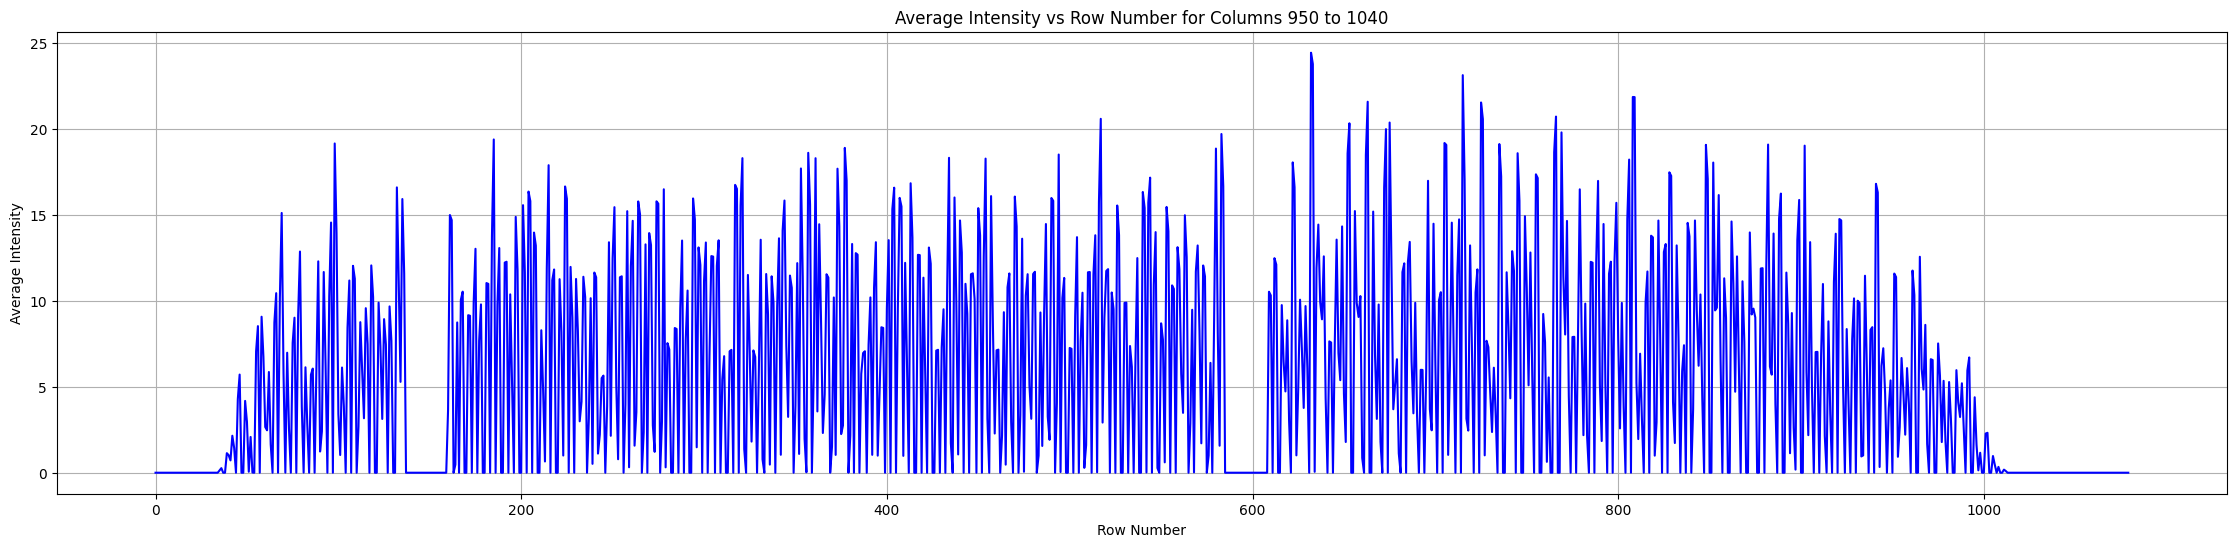

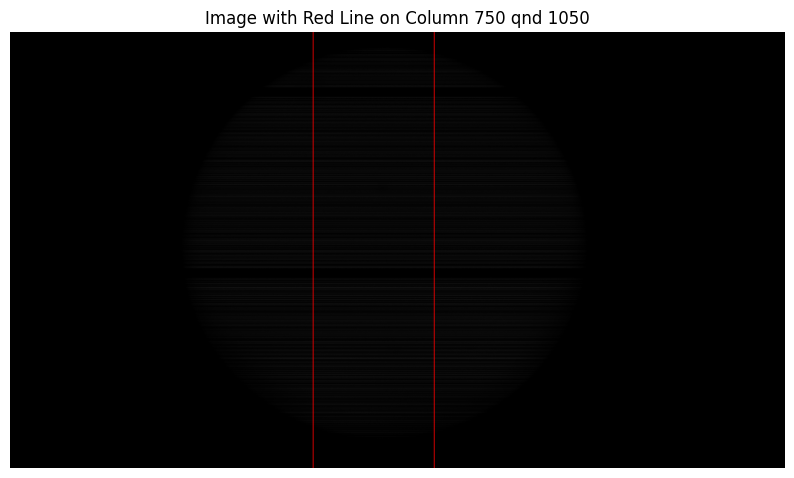

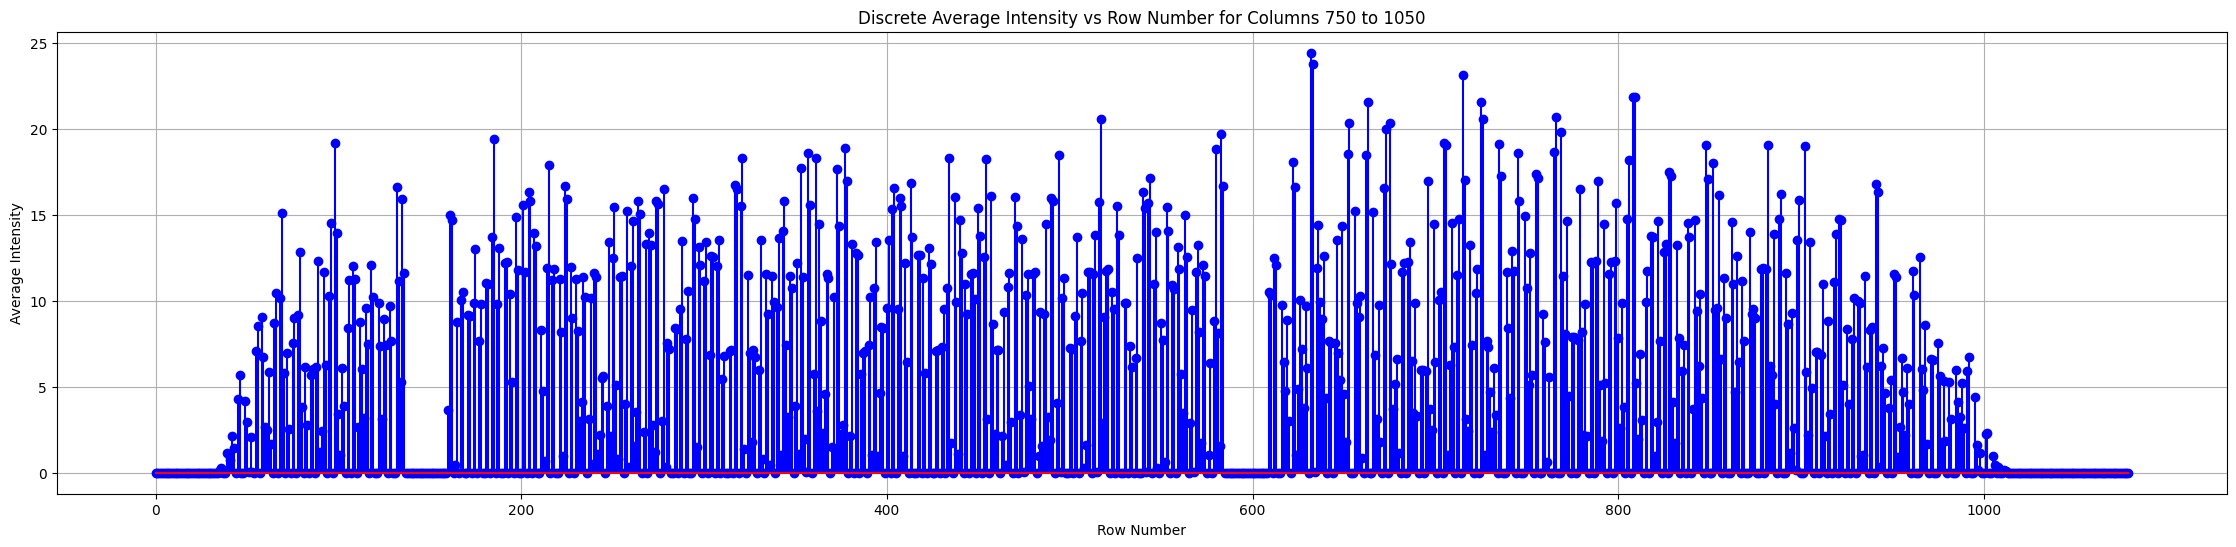

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

# Load the TIFF image
image_path =  fr'F:\My File\OCC_Nov_11\Datasets_L8_8_subcarrier\3_rx_image\m1\17.tiff'   # Update with the correct file path
image = Image.open(image_path)
image_data = np.array(image).astype(float)
# Now, round the values to 3 decimal places
image_data = np.around(image_data, decimals=3)

# Extract all pixel values from column range 951 to 1049 (inclusive)
columns_range = image_data[:, 750:1050]  # Slicing columns from 951 to 1049 (98 columns)
column_avg = np.mean(columns_range, axis=1)  # Averaging the columns for each row
column_avg_rounded = np.round(column_avg, 3)
# Save the average column values to a txt file with float precision
np.save('column_951_to_1049_avg_values.npy', column_avg_rounded)
np.savetxt('column_951_to_1049_avg_values.txt', column_avg, fmt='%.3f')

# Print the average pixel values for the 98 columns
print(column_avg)

# Plot intensity vs row number for the averaged columns (951-1049)
plt.figure(figsize=(28, 6))
plt.plot(np.arange(len(column_avg)), column_avg, color='blue', linestyle='-')
plt.title('Average Intensity vs Row Number for Columns 950 to 1040')
plt.xlabel('Row Number')
plt.ylabel('Average Intensity')
plt.grid(True)
plt.show()

# Draw a red line on column 1000 of the image
image_with_line = image.convert("RGB")  # Convert the image to RGB format to allow drawing
draw = ImageDraw.Draw(image_with_line)
draw.line([(750, 0), (750, image_data.shape[0])], fill="red", width=2)  # Draw a red line on column 1000
draw.line([(1050, 0), (1050, image_data.shape[0])], fill="red", width=2)  # Draw a red line on column 1000

# Show the image with the red line
plt.figure(figsize=(10, 8))
plt.imshow(image_with_line)
plt.title("Image with Red Line on Column 750 qnd 1050")
plt.axis("off")
plt.show()

# # Save the image with the red line
# image_with_line.save("image_with_red_line_on_column_1000.tiff")

# Plot intensity vs row number for the averaged columns (951-1049) as discrete points
plt.figure(figsize=(28, 6))
plt.stem(
    np.arange(len(column_avg)),  # Row numbers
    column_avg,                 # Average intensities
    linefmt='b-',               # Line style
    markerfmt='bo',             # Marker style
    basefmt='r-'                # Base line style
)
plt.title('Discrete Average Intensity vs Row Number for Columns 750 to 1050')
plt.xlabel('Row Number')
plt.ylabel('Average Intensity')
plt.grid(True)
plt.show()



In [ ]:
value_p= [ 9.53   , 20.54667, 14.87667,  7.11   , 19.08667, 11.67   ,
        0.     , 23.87333, 23.70333,  0.     ,  0.     , 17.95333,
       12.88667, 13.93333, 17.86667,  9.65667,  0.79   , 12.77333,
       12.56   ,  0.     ,  0.     , 10.95667, 10.46333,  0.06   ,
       16.03333, 18.18333,  0.     , 22.48333, 23.89   ,  0.     ,
        0.     ,  8.59   ,  8.68   ,  1.12   , 13.97667,  3.99   ,
        0.76   , 20.83333, 23.68667,  0.     ,  0.     , 23.78333,
        8.94667,  9.77333, 23.18   ,  8.83667,  3.74333, 18.51   ,
       17.36333,  0.     ,  0.     , 23.94667, 12.74333,  4.73333,
       20.47333,  9.85333,  0.92667, 19.49667, 21.7    ,  0.     ,
       21.92333, 24.17   ,  8.62   ,  0.06333, 15.70333,  7.47333,
        0.     , 16.99667, 21.26333,  0.     , 32.39   , 12.82   ,
        0.72667,  0.     ,  8.96667,  4.88667,  5.47333, 18.01667,
       25.16667,  0.     , 31.43333, 31.06667,  8.71   ,  3.87333,
       18.66667, 11.21   ,  0.     , 11.33333, 15.48667,  0.     ,
       29.82667, 28.92   ,  4.13   ,  8.13   , 14.56333, 10.13667,
        6.10667, 11.80667,  7.80667,  0.     , 20.51667, 17.54667,
        0.     ,  0.     , 16.53667, 12.36667,  5.81667, 18.33333,
       20.33667,  0.     , 25.42333, 22.27   ,  0.08667,  7.56   ,
       21.14333, 16.05667,  6.65333, 18.46   , 11.32667,  0.     ,
       30.26667, 24.29333,  0.     ,  0.     , 12.87667, 11.55667,
        1.03   ,  8.91   ,  0.75333,  0.     , 32.83667, 29.30667,
        0.     ,  0.     , 22.79667, 10.90333,  2.23   ,  9.77667,
        5.39   ,  0.     , 30.25   , 24.47667,  0.     ,  0.     ,
       26.81333, 15.33333,  3.58   , 20.81667, 11.71   ,  0.     ,
       20.     , 22.46333,  0.     ,  0.     , 11.25667,  7.59333,
        5.     , 15.97667,  5.97667,  0.     , 19.04   , 23.84   ,
        0.     , 24.45667, 22.26333,  6.56   ,  3.27   , 21.06   ,
       11.86667,  0.     , 18.53667, 19.66333,  0.     , 19.57333,
       24.56   , 10.46333,  5.85667, 10.04667,  5.41   ,  0.     ,
       10.05333, 11.26   ,  0.     , 11.36667, 29.32   ,  6.61   ,
        5.37667, 21.17   , 11.87   ,  0.     ,  9.8    , 11.76333,
        0.     , 25.75333, 24.53667,  1.14667,  1.56667, 25.72333,
       15.18667,  0.     , 14.05667, 21.05   ,  0.     , 24.80667,
       22.62333,  2.92667,  4.08667, 11.42   ,  7.97333,  2.66   ,
       12.07667, 13.57667,  0.     , 28.19333, 24.58333,  0.     ,
       10.32667, 19.6    , 14.64333,  6.45667, 20.03667, 13.98   ,
        0.     , 19.81667, 19.80667,  0.09333,  5.35333, 21.72333,
       16.93667,  6.17333, 15.32667,  7.14   ,  0.     , 17.31667,
       11.26   ,  0.     ,  0.     , 26.41333, 17.82667, 10.33333,
       26.86333, 20.54667,  0.     , 23.35   , 22.58   ,  0.     ,
        0.     , 18.07333, 12.89   ,  7.37667, 25.80333, 13.99667,
        0.98333, 20.02   , 17.91333,  0.     ,  0.     , 13.20667,
       13.21667,  0.     , 11.96667,  7.64   ,  0.     , 17.52333,
       19.78333,  0.     ,  0.     , 18.11667, 12.09   ,  2.39333,
        9.94   ,  3.72   ,  0.     , 15.31667, 17.98333,  0.     ,
       17.89   , 19.92   ,  7.50333, 12.54667, 27.99667, 13.35   ,
        0.     , 16.11333, 20.74667,  0.     , 22.52   , 17.93   ,
        9.55667,  7.44333, 25.90667, 14.39   ,  0.99667, 23.42333,
       20.99   ,  0.     , 30.56667, 17.90333,  4.10333,  0.     ,
       14.82333,  9.47667,  0.     , 19.38667, 30.33333,  0.     ,
       25.87667, 24.65667,  2.16   ,  6.63667, 15.12333, 10.58333,
        0.     , 10.15   , 14.47667,  0.     , 17.83333, 15.01   ,
        1.05333,  0.65333, 21.06   , 15.02   ,  0.     , 13.35   ,
       23.13   ,  0.     , 21.42   , 17.98333,  0.     ,  0.     ,
       21.28667, 16.2    ,  6.52667, 20.70667, 15.51333,  0.     ,
        8.63667,  8.68   ,  0.     ,  0.     , 17.52   , 14.10667,
        2.49333, 17.37333, 20.02   ,  0.     , 23.75   , 17.50667,
        0.     ,  0.     , 17.49333, 15.21667,  1.42333, 10.92667,
        3.34   ,  0.     , 29.59   , 24.07   ,  0.     ,  0.     ,
       27.82333, 14.73333,  1.07333, 13.97   ,  5.48667,  0.     ,
       19.77667, 23.89   ,  0.     ,  0.     , 23.62667, 18.86667,
        8.21   , 17.03   ,  9.09667,  0.     , 15.03   , 17.15   ,
        0.     ,  0.     , 10.64333,  9.57667,  3.28667, 19.88333,
       10.82333,  0.     , 23.02333, 26.34333,  0.     ,  0.     ,
       16.71333,  7.25   ,  6.99667, 19.74333, 10.09   ,  0.     ,
       15.13667, 19.42333,  0.     , 29.89333, 16.37333,  9.81   ,
        3.09667, 13.45   ,  8.23333,  0.     , 13.74667, 19.11   ,
        0.     , 22.43667, 22.19667,  7.37333,  2.12667, 25.27   ,
       14.75667,  0.     ,  9.64333, 13.41   ,  0.     , 10.20667,
        9.93   ,  0.     ,  0.     , 18.59   , 12.63   ]

# Define a function for custom max value selection
def find_max_values(batch):
    length = len(batch)
    if length in [4, 5, 6]:  # Special case for lengths 4, 5, and 6
        # Find max value from the first 3 elements
        max_first_part = max(batch[:3])
        # Find max value from the remaining elements
        max_second_part = max(batch[3:]) if length > 3 else None
        return [max_first_part, max_second_part] if max_second_part is not None else [max_first_part]
    elif length in [7, 8, 9]:  # Special case for lengths 8 and 9
        # Max from the first 3 values
        max_first_part = max(batch[:3])
        # Max from the next 3 values
        max_second_part = max(batch[3:6])
        # Max from the remaining values
        max_remaining = max(batch[6:]) if length > 6 else None
        return [max_first_part, max_second_part, max_remaining] if max_remaining is not None else [max_first_part, max_second_part]
    elif length == 1:  # Special case for length 1
        return batch  # Return the single value as is
    elif length == 3:  # Special case for length 3
        return [max(batch)]  # Return the maximum of the batch
    else:  # Default case (no special rule)
        return [max(batch)]  # Return the overall max

def rx_data(value_p):
    s_batch = []
    rx_mess = []
    len_b = []
    start_idx = None
    for i, avg_pixel in enumerate(value_p):
        int_avg = int(avg_pixel)
        if int_avg == 0:
            if start_idx is not None and start_idx<i:
                b_in_b = value_p[start_idx:i]
                # call the max value function
                max1_values = find_max_values(b_in_b)
                rx_mess.append(max1_values)
                s_batch.append(b_in_b)
                len_b.append(len(b_in_b))
            start_idx = None
        else:
            if start_idx is None:
                start_idx = i

    if start_idx is not None and start_idx<len(value_p):
        bin_b = value_p[start_idx:]
        # call the max value function
        max2_values = find_max_values(bin_b)
        rx_mess.append(max2_values)
        s_batch.append(bin_b)
        len_b.append(len(bin_b))

    print("batch value_p",s_batch)
    print("each batch length",len_b)
    print("rx message",rx_mess)

    # Flatten the list of max values batches and remove brackets/parentheses
    flat_max_values = [value for batch in rx_mess for value in batch]

    if len(flat_max_values)==128:
        # Convert to a space-separated string for cleaner output
        result = " ,".join(map(str, flat_max_values))
        return result

    # print("Max values without parentheses or brackets:")
    # print(result)

    



batch value_p [[9.53, 20.54667, 14.87667, 7.11, 19.08667, 11.67], [23.87333, 23.70333], [17.95333, 12.88667, 13.93333, 17.86667, 9.65667], [12.77333, 12.56], [10.95667, 10.46333], [16.03333, 18.18333], [22.48333, 23.89], [8.59, 8.68, 1.12, 13.97667, 3.99], [20.83333, 23.68667], [23.78333, 8.94667, 9.77333, 23.18, 8.83667, 3.74333, 18.51, 17.36333], [23.94667, 12.74333, 4.73333, 20.47333, 9.85333], [19.49667, 21.7], [21.92333, 24.17, 8.62], [15.70333, 7.47333], [16.99667, 21.26333], [32.39, 12.82], [8.96667, 4.88667, 5.47333, 18.01667, 25.16667], [31.43333, 31.06667, 8.71, 3.87333, 18.66667, 11.21], [11.33333, 15.48667], [29.82667, 28.92, 4.13, 8.13, 14.56333, 10.13667, 6.10667, 11.80667, 7.80667], [20.51667, 17.54667], [16.53667, 12.36667, 5.81667, 18.33333, 20.33667], [25.42333, 22.27], [7.56, 21.14333, 16.05667, 6.65333, 18.46, 11.32667], [30.26667, 24.29333], [12.87667, 11.55667, 1.03, 8.91], [32.83667, 29.30667], [22.79667, 10.90333, 2.23, 9.77667, 5.39], [30.25, 24.47667], [26.813